In [1]:
from datasets import load_dataset, concatenate_datasets
from transformers import T5Tokenizer
from torch.utils.data import DataLoader
from transformers import T5ForConditionalGeneration
from transformers import Trainer, TrainingArguments
import torch

In [2]:
save_path = "fine_tuned_t5_updated/"

model = T5ForConditionalGeneration.from_pretrained(save_path)
tokenizer = T5Tokenizer.from_pretrained(save_path)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [3]:
test_input_text = "fill in the missing X Axis ticks: Mapping Value\tX Axis Tick\n1\tJanuary\n2\t\n3\tMarch\n4\t\n5\tMay\n6\t\n7\tJuly\n8\t\n9\tSeptember\n10\t\n11\tNovember\n12\t"

# Tokenize the input
input_ids = tokenizer(test_input_text, return_tensors = "pt").input_ids.to(device)

# Generate predictions
outputs = model.generate(input_ids, max_length = 128)

# Decode the output
generated_text = tokenizer.decode(outputs[0], skip_special_tokens = True)
print("Generated Output:\n", generated_text)

Generated Output:
 Mapping Value X Axis Tick 1 January 2 February 3 March 4 April 5 May 6 June 7 July 8 August 9 September 10 October 11 November 12 December


In [4]:
test_input_text = "fill in the missing X Axis ticks:\nMapping Value\tX Axis Tick\n1\tOption 4\n2\t\n3\tOption 12\n4\t\n5\tOption 20\n6\t\n7\tOption 28\n8\t\n9\tOption 36"

# Tokenize the input
input_ids = tokenizer(test_input_text, return_tensors = "pt").input_ids.to(device)

# Generate predictions
outputs = model.generate(input_ids, max_length = 128)

# Decode the output
generated_text = tokenizer.decode(outputs[0], skip_special_tokens = True)
print("Generated Output:\n", generated_text)

Generated Output:
 Mapping Value X Axis Tick 1 Option 4 2 Option 8 3 Option 12 4 Option 16 5 Option 20 6 Option 24 7 Option 28 8 Option 32 9 Option 36


In [5]:
test_input_text = "fill in the missing X Axis ticks:\nMapping Value\tX Axis Tick\n1\t13-Dec-2021\n2\t\n3\t23-Dec-2021\n4\t\n5\t02-Jan-2022\n6\t\n7\t12-Jan-2022\n8\t"

# Tokenize the input
input_ids = tokenizer(test_input_text, return_tensors = "pt").input_ids.to(device)

# Generate predictions
outputs = model.generate(input_ids, max_length = 128)

# Decode the output
generated_text = tokenizer.decode(outputs[0], skip_special_tokens = True)
print("Generated Output:\n", generated_text)

Generated Output:
 Mapping Value X Axis Tick 1 13-Dec-2021 2 18-Dec-2021 3 23-Dec-2021 4 28-Dec-2021 5 02-Jan-2022 6 06-Jan-2022 7 12-Jan-2022 8 18-Jan-2022


In [18]:
test_input_text = "fill in the missing X Axis ticks:\nMapping Value\tX Axis Tick\n1\t1\n2\t\n3\t3\n4\t\n5\t5\n6\t\n7\t7\n8\t\n9\t9\n10\t"

# Tokenize the input
input_ids = tokenizer(test_input_text, return_tensors = "pt").input_ids.to(device)

# Generate predictions
outputs = model.generate(input_ids, max_length = 128)

# Decode the output
generated_text = tokenizer.decode(outputs[0], skip_special_tokens = True)
print(test_input_text)
print("Generated Output:\n", generated_text)

fill in the missing X Axis ticks:
Mapping Value	X Axis Tick
1	1
2	
3	3
4	
5	5
6	
7	7
8	
9	9
10	
Generated Output:
 Mapping Value X Axis Tick 1 1 2 2 3 3 4 5 5 6 7 7 8 9 9 10


In [7]:
test_input_text = "fill in the missing X Axis ticks:\nMapping Value\tX Axis Tick\n1\t[-544, -519]\n2\t\n3\t[-494, -469]\n4\t\n5\t[-444, -419]\n6\t\n7\t[-394, -369]\n8\t\n9\t[-344, -319]\n10\t\n11\t[-294, -269]\n12\t"

# Tokenize the input
input_ids = tokenizer(test_input_text, return_tensors = "pt").input_ids.to(device)

# Generate predictions
outputs = model.generate(input_ids, max_length = 128)

# Decode the output
generated_text = tokenizer.decode(outputs[0], skip_special_tokens = True)
print("Generated Output:\n", generated_text)

Generated Output:
 Mapping Value X Axis Tick 1 [-544, -519] 2 [-519, -494] 3 [-494, -469] 4 [-469, -444] 5 [-444, -419] 6 [-419, -394] 7 [-394, -369] 8 [-369, -344] 9 [-344, -319] 10 [-319, -294] 11 [-294, -269] 12 [-269, -294]


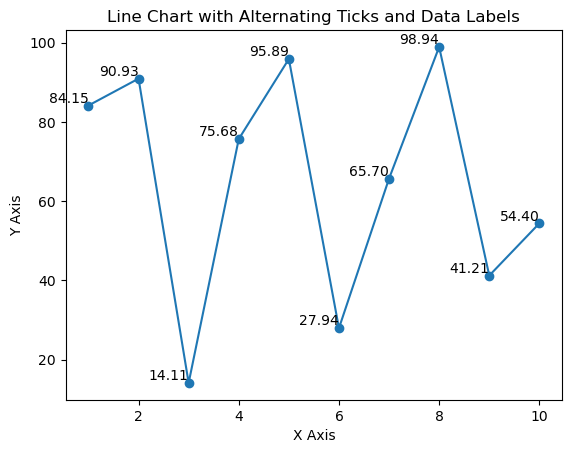

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
x = np.linspace(1, 10, 10)
y = abs(np.sin(x) * 100)

# Create the plot
fig, ax = plt.subplots()

ax.plot(x, y, marker='o', linestyle='-')

# Set specific x-axis ticks to 2, 4, 6, 8, 10
x_ticks = [2, 4, 6, 8, 10]
ax.set_xticks(x_ticks)
ax.set_xticklabels([str(val) for val in x_ticks])

# Add data labels on each point
for i in range(len(x)):
    ax.text(x[i], y[i], f'{y[i]:.2f}', fontsize=10, ha='right', va='bottom')

ax.set_title("Line Chart with Alternating Ticks and Data Labels")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

# Save the plot as an image
plt.savefig("line_chart.png", dpi=300)

# Show the plot
plt.show()
